# Customer Personality Analysis
## Joshua Hess

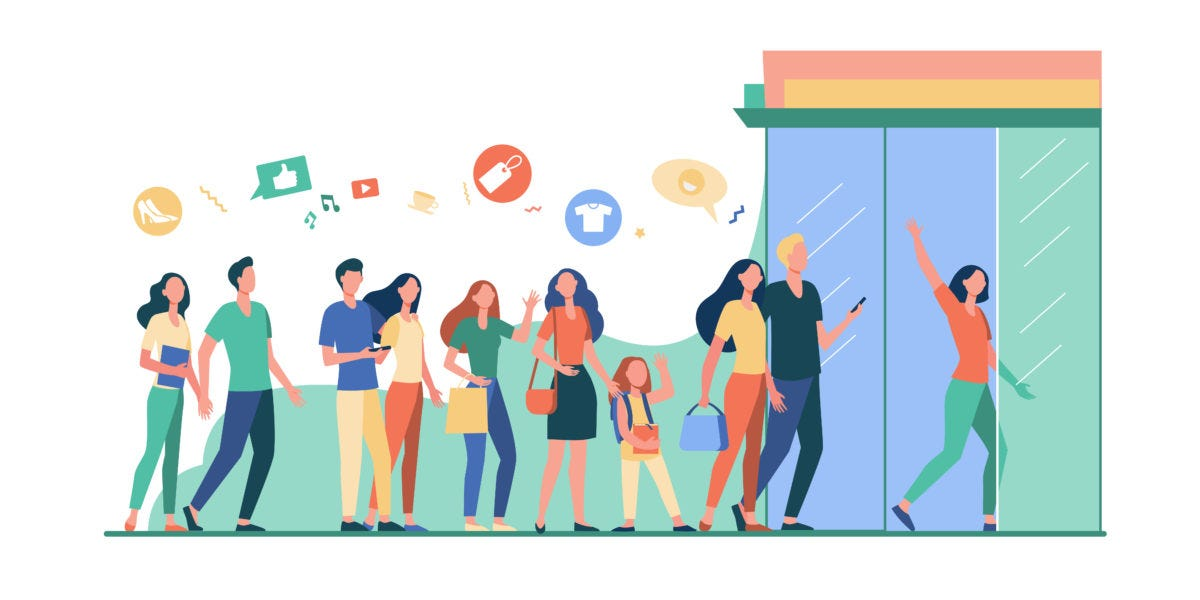

## Introduction

This project's purpose is to examine customer data and perform a customer personality analysis. This can help identify the common groups that customers fall into, and allow us to perform a customer segmentation. A **customer segmentation** is a method where a business can divide their customers into a few specific subgroups. This is helpful because a business can decide how to market differently to each one of these subgroups to maximize the business' overall profit. We will perform this segmentation using a machine learning model called *K-Means Clustering*. 

## How K-Means Clustering Works

*K-Means Clustering* is an unsupervised model, which means it attempts to find patterns or trends within the data. It plots multiple details about a customer population, and then attempts to find "clusters" of customers that are similar to each other. This allows the model to identify each cluster as a subgroup of our customer population. Once we've identified our different subgroups, we can do some analysis to learn more details about each subgroup. 

This project will have the following structure:

1. Loading in and inspecting data.
2. Cleaning data. (handling missing values, checking for outliers)
3. Feature engineering.
4. Data preprocessing for machine learning.
5. Creating K-Means Clustering model.
6. Compare the spending habits of each cluster.
7. Profile each cluster.
8. Conclusions

# 1) Loading in and Inspecting Data

Let's first load in our data and take a look at the given variables:

In [1]:
# Import data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mute warnings (UNCOMMENT WHEN FINISHED)
import warnings
warnings.filterwarnings('ignore')

# Load in and inspect data
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv", sep = "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 2) Cleaning Data

## Dealing with Missing Values

In order to deal with missing values, let's first print a summary of which columns have missing values:

In [2]:
# Print data type and missing value info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

This dataset is very tidy, with only one variable having missing values: `Income`. Since only 0.012% of the observations have missing values, we can simply drop the observations with missing values. Additionally, we cast the `Dt_Customer` variable to a datetime object for proper dating:

In [3]:
# Drop NA's
data_cleaned = data.dropna()
print("The number of observations after dropping missing values is ", len(data_cleaned))

# Convert Dt_Customer to datetime
data_cleaned['Dt_Customer'] = pd.to_datetime(data_cleaned['Dt_Customer'], format = 'mixed')

The number of observations after dropping missing values is  2216


## Dealing with Outliers

To get an overall look at which features may contain outliers, let's print a numerical summary of each feature:

In [4]:
# Print numerical summaries for each variable
data_cleaned.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-11 23:50:54.151624704,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In the above output, we can notice two discrepancies:

1. While `Income` has a mean of 52,247.25 and a standard deviation of 25,173.08, it has a maximum value of 666,666.00. To account for this large outlier, we'll restrict `Income` to values of 500,000 USD or less.

2. `Year_Birth` has its earliest year of birth in 1893. We want to restrict the ages to more realistic age ranges, so we'll limit the observations to customers with birth years in or after 1940. 

In the below code block, we update our DataFrame to remove these outliers:

In [5]:
# Remove incomes above 500,000
data_cleaned = data_cleaned[data_cleaned['Income'] <= 500000]
print("The number of observations after dropping Income outliers is ", len(data_cleaned))

# Remove birth years before 1940
data_cleaned = data_cleaned[data_cleaned['Year_Birth'] >= 1940]
print("The number of observations after dropping Birth Year outliers is ", len(data_cleaned))

The number of observations after dropping Income outliers is  2215
The number of observations after dropping Birth Year outliers is  2212


# 3) Feature Engineering

Now that our data is cleaned, we can create some new features to better capture some information in our data. Here is a list of each of the features we'll create:

1. `Age`: Subtract the customer's year of birth from 2021 (when the data was collected) to calculate their age.
2. `Total_Spent`: Adds up the amount spent in each category to track total spending over the span of two years.
3. `Live_With`: Has two possible values 'Alone' or 'Partner' based on the value of `Marital_Status`.
4. `Children`: Adds the amount of kids and teens at home to get the total number of children.
5. `Family_Size`: Adds the value of `Live_With` (1 for alone, 2 for partner) to the number of children to calculate the total family size.
6. `Education`: We will change the Education variable by generalizing the data into three groups: 'Undergraduate', 'Graduate', and 'Postgraduate.' 
7. We will drop redundant features after adding the above features.

Below, we add each of these features and make any other updates as needed:

In [6]:
# Age of customer
data_cleaned['Age'] = 2021 - data_cleaned['Year_Birth']

# Total spent
data_cleaned['Total_Spent'] = data_cleaned['MntWines'] + data_cleaned['MntFruits'] + data_cleaned['MntMeatProducts'] + data_cleaned['MntFishProducts'] + data_cleaned['MntSweetProducts'] + data_cleaned['MntGoldProds']

# Determine 'Live_With' from 'Marital_Status'
data_cleaned['Live_With'] = data_cleaned['Marital_Status'].replace({'Married' : 'Partner', 'Together' : 'Partner', 'Absurd' : 'Alone', 'Widow' : 'Alone', 'YOLO' : 'Alone', 'Divorced' : 'Alone', 'Single' : 'Alone'})

# Total children in household
data_cleaned['Children'] = data_cleaned['Kidhome'] + data_cleaned['Teenhome']

# Total family size
data_cleaned['Family_Size'] = data_cleaned['Live_With'].replace({'Alone' : 1, 'Partner' : 2}) + data_cleaned['Children']

# Is parent (1) or isn't parent (0)
data_cleaned['Is_Parent'] = np.where(data_cleaned.Children > 0, 1, 0)

# Generalize education categories
data_cleaned['Education'] = data_cleaned['Education'].replace({'Basic' : 'Undergraduate', '2n Cycle' : 'Undergraduate', 'Graduation' : 'Graduate', 'Master' : 'Postgraduate', 'PhD' : 'Postgraduate'})

# Total accepted promotions
data_cleaned['Total_Promos'] = data_cleaned['AcceptedCmp1'] + data_cleaned['AcceptedCmp2'] + data_cleaned['AcceptedCmp3'] + data_cleaned['AcceptedCmp4'] + data_cleaned['AcceptedCmp5']

# Simplify column names
renamed_cols = {
    'MntWines' : 'Wines',
    'MntFruits' : 'Fruits',
    'MntMeatProducts' : 'Meats',
    'MntFishProducts' : 'Fish',
    'MntSweetProducts' : 'Sweets',
    'MntGoldProds' : 'Gold'
}
data_cleaned = data_cleaned.rename(columns = renamed_cols)

# Drop redundant variables
dropped_cols = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
data_cleaned = data_cleaned.drop(dropped_cols, axis = 1)

# Check DataFrame
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meats                2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

Now with our new features prepared and our data cleaned, we're ready to begin our machine learning pipeline.

# 4) Data Preprocessing

Now we are good to begin preprocessing our data before plugging it into a K-Means Clustering model. We have three steps in this sections:

1. Encode categorical variables
2. Scale numerical variables using standard scaler
3. Use Principal Component Analysis (PCA) to reduce dimensionality

First, we'll begin with preprocessing our categorical and numerical variables:

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode both categorical variables
for feat in ['Education', 'Live_With']:
    data_cleaned[feat] = data_cleaned[[feat]].apply(encoder.fit_transform)
    
print("Categorical variables successfully encoded.")

Categorical variables successfully encoded.


In [8]:
from sklearn.preprocessing import StandardScaler

# Create copy of DataFrame and drop variables about deals/promotions
data_copy = data_cleaned.copy()
cols_to_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
data_copy = data_copy.drop(cols_to_del, axis = 1)

# Scale each of the numeric variables with standard scaler
scaler = StandardScaler()
scaler.fit(data_copy)
data_preprocessed = pd.DataFrame(scaler.transform(data_copy), columns = data_copy.columns)
print("Numeric variables were successfully scaled.")

Numeric variables were successfully scaled.


## PCA - What is Dimensionality Reduction?

In a K-Means Clustering model, the "clusters" are found by calculating the distance between points in high-dimensional spaces. However, this distance can be harder to calculate and interpret in higher dimensions. **Principal Component Analysis** takes in the data, and creates a given number of variables that capture the majority of the variance in the data, which also captures the most information.

For our PCA, we will use 3 PCA components. This will make visualizing our clusters in 3D space much easier. Below, we create a new DataFrame to hold our calculated PCA components:

In [9]:
from sklearn.decomposition import PCA

# Initialize and fit PCA with 3 components
pca = PCA(n_components = 3)
pca.fit(data_preprocessed)

# Transform the data and store it in a new DataFrame
PCA_data = pd.DataFrame(pca.transform(data_preprocessed), columns=(['col1', 'col2', 'col3']))
PCA_data.describe()

,col1,col2,col3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,3.212219e-17,-1.284887e-17,-3.934968e-17
std,2.905276e+00,1.700140e+00,1.153765e+00
min,-5.937304e+00,-4.291214e+00,-3.053455e+00
25%,-2.559075e+00,-1.341041e+00,-8.721639e-01
50%,-8.180595e-01,-1.444143e-01,-1.369444e-01
75%,2.363559e+00,1.246313e+00,8.096906e-01
max,7.875540e+00,6.107392e+00,4.013358e+00


Above, our PCA created three components: `col1`, `col2`, and `col3`. These components are normalized, so they should all have a mean close to 0 and a standard deviation close to 1. To see what our data looks like in 3D space, let's graph our points:

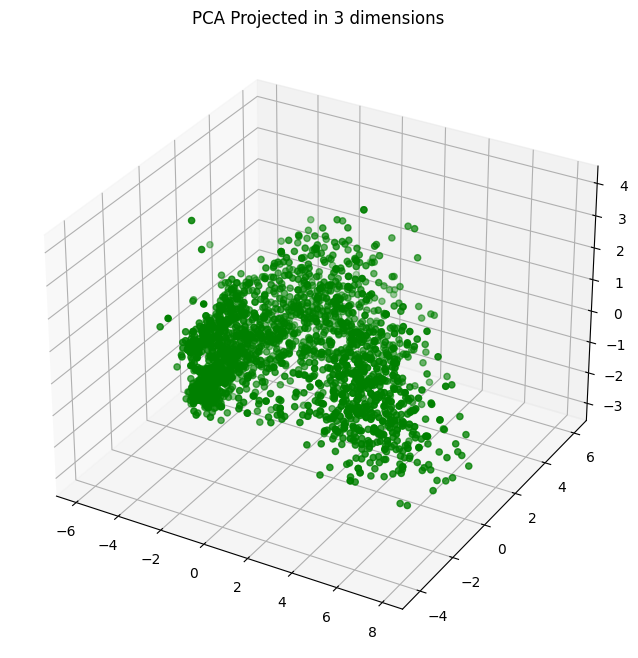

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Separate each component to its own axis
x = PCA_data['col1']
y = PCA_data['col2']
z = PCA_data['col3']

# Plot the data in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c = 'green', marker = 'o')
ax.set_title("PCA Projected in 3 dimensions")
plt.show()

# 5) Creating K-Means Clustering Model

Now that our data's dimensionality has been reduced to three dimensions, we are good to begin creating our K-Means Clustering model. First, we must determine **how many clusters** we should be trying to find in our data. A common way this is determined is using the Elbow Method to calculate the optimal number of clusters for our model. Below, we use the Elbow Method to see how many clusters we should find:

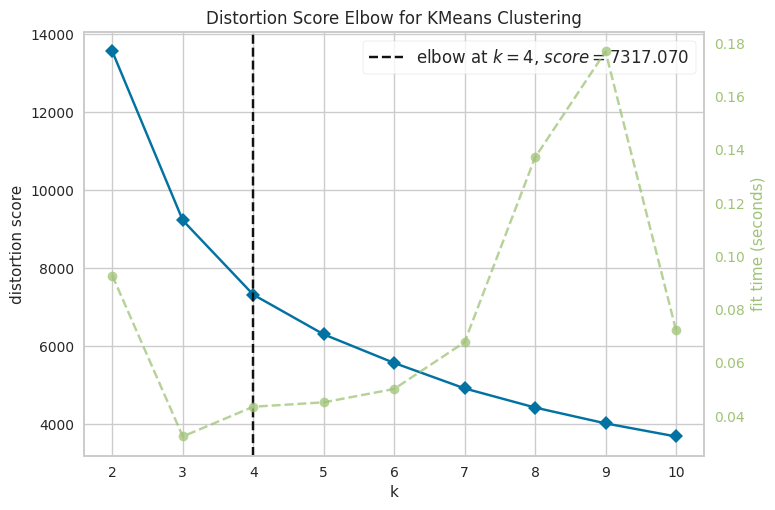

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Perform Elbow Method
elbow_model = KElbowVisualizer(KMeans(), k = 10)
elbow_model.fit(PCA_data)
elbow_model.show()

From the above elbow plot, we can see that the optimal number of clusters is 4. In the below code block, we actually fit the model and find our clusters using an Agglomerative Clustering Model:

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Initiate ML model
AC = AgglomerativeClustering(n_clusters = 4)

# Fit the model and find clusters
cluster_labels = AC.fit_predict(PCA_data)
PCA_data['Clusters'] = cluster_labels

# Add cluster to original data as well
data_cleaned['Clusters'] = cluster_labels

Let's recreate our 3D projection of data points from before, but now we'll color them by their predicted cluster:

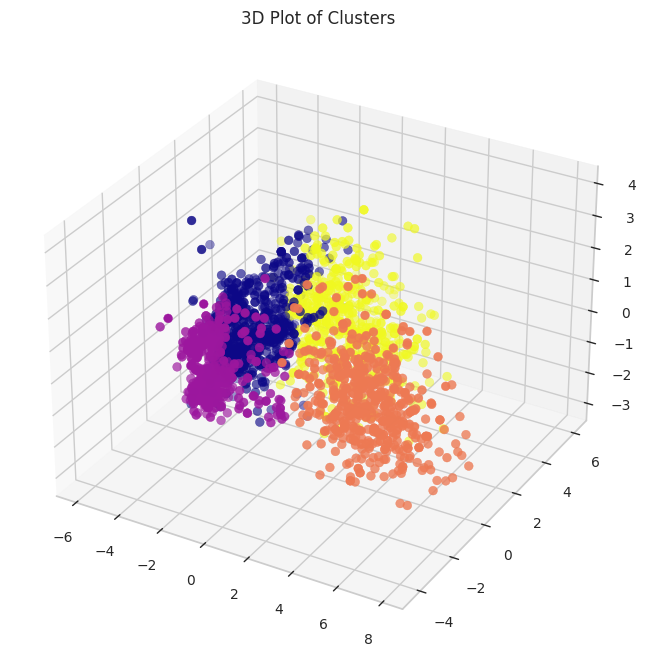

In [13]:
# Plot clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = PCA_data['Clusters'], marker = 'o', cmap = 'plasma')
ax.set_title("3D Plot of Clusters")
plt.show()

# 6) Analyze Spending Habits of Each Cluster

## K-Means and Unsupervised Learning

Clustering is an **unsupervised learning model**, meaning that it does not label our clusters for us. This means that we don't know what type of customers each cluster represents. This section of the notebook will conduct an exploratory data analysis of our 4 clusters to determine information about the spending habits of each cluster.

## Exploratory Data Analysis

The first thing we want to verify is that our clusters are fairly distributed. After that, we'll create a scatterplot to examine the spending and income of each cluster:

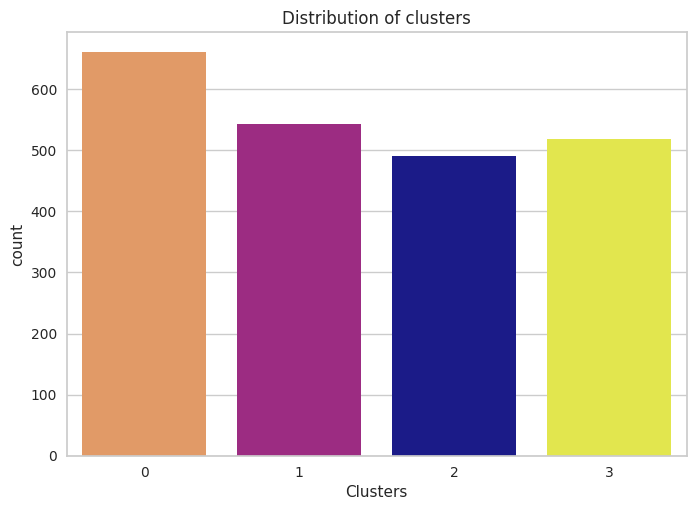

In [14]:
# Define color palette for plots
pal = ['#F59753', '#AF198C', '#09099A', '#FAFF35']

# Plot countplot of each cluster
sns.countplot(data_cleaned, x = 'Clusters', palette = pal)
plt.title('Distribution of clusters')
plt.show()

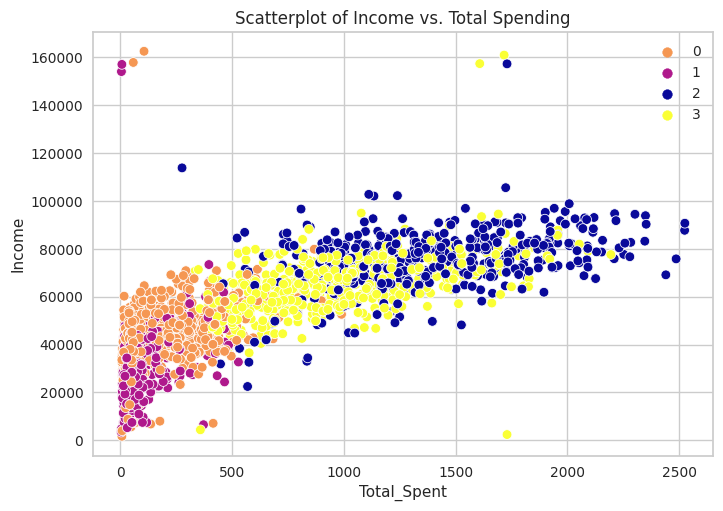

In [15]:
# Plot Income vs. Total_Spent colored by cluster
sns.scatterplot(data_cleaned, x = 'Total_Spent', y = 'Income', hue = 'Clusters', palette = pal)
plt.title('Scatterplot of Income vs. Total Spending')
plt.legend()
plt.show()

From the above scatterplot, we can summarize the income and spending habits of each cluster:

- *Cluster 0:* High spending and average income.
- *Cluster 1:* Low spending and low/average income.
- *Cluster 2:* High spending and high income.
- *Cluster 3:* Low spending and average income.

Let's also take a look at the distributions of each cluster's spending to see which clusters represent our customers the most:

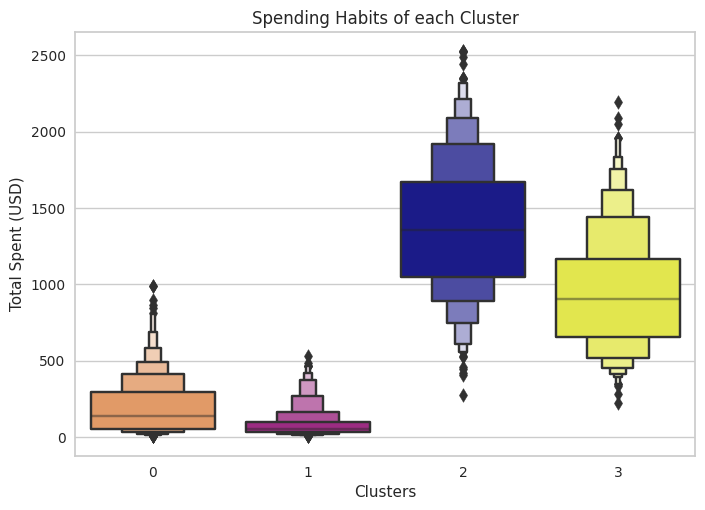

In [16]:
# Plot distributions of spending for each cluster
sns.boxenplot(data_cleaned, x = 'Clusters', y = 'Total_Spent', palette = pal)
plt.title('Spending Habits of each Cluster')
plt.ylabel('Total Spent (USD)')
plt.show()

From an initial glance, it seems that cluster 2 and 0 are our biggest sets of customers respectively. One other thing we can examine is how many promotions were accepted in each cluster:

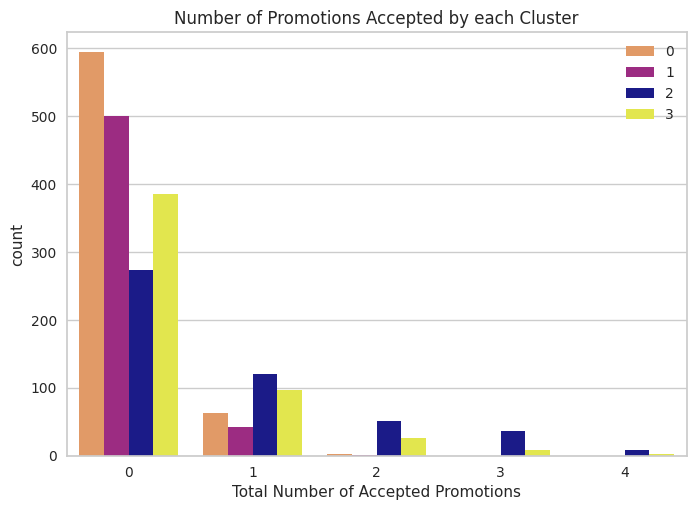

In [17]:
# Plot countplot of Total_Promos for each cluster
sns.countplot(data_cleaned, x = 'Total_Promos', hue = 'Clusters', palette = pal)
plt.title('Number of Promotions Accepted by each Cluster')
plt.xlabel('Total Number of Accepted Promotions')
plt.legend()
plt.show()

There's a couple of important observations we can make from the above plot:

- There are not very many responses to the campaign. The majority of the customers accepted 0 promotions.
- The customers who accepted promotions were mostly from cluster 0 and 2. **Only** customers from clusters 0 and 2 completed 3 or more promotions.
- No customers completed 5 promotions, which suggests that the campaign could be reworked to target specific clusters of customers to be more effective.

Lastly, let's also see how many deals were used by customers by cluster:

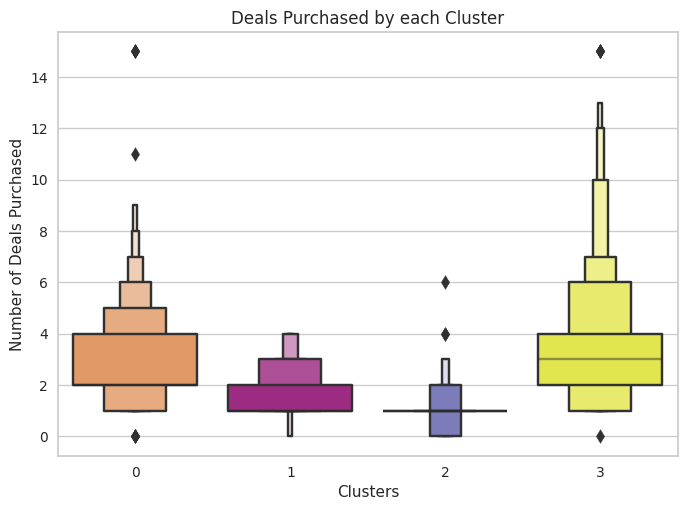

In [18]:
# Plot distribution of NumDealsPurchases for each cluster
sns.boxenplot(data_cleaned, x = 'Clusters', y = 'NumDealsPurchases', palette = pal)
plt.title('Deals Purchased by each Cluster')
plt.ylabel('Number of Deals Purchased')
plt.show()

A couple of observations on the above plot:

- Deals were much more popular with customers than promotions, with a decent amount of customers in almost every cluster using some deals.
- Cluster 0 used the most deals, but cluster 2 (our strongest cluster in other analyses) did not respond well to deals. 
- Cluster 3 participated in little to no promotions, but had a strong response to deals. This could be leveraged during customer segmentation.

# 7) Profiling each Cluster

Now that we have an idea of what the spending habits look like for each cluster, we need to understand what type of customer belongs to each cluster. To do this, we'll examine the personal information of each cluster to determine what type of person is in that subgroup. Below, we create a jointplot of each variable containing personal information and their total spending. We color the results by cluster to find trends or patterns between the clusters:

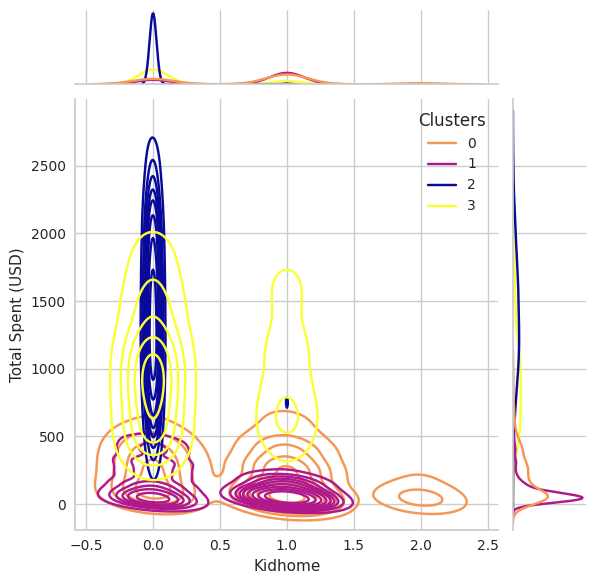

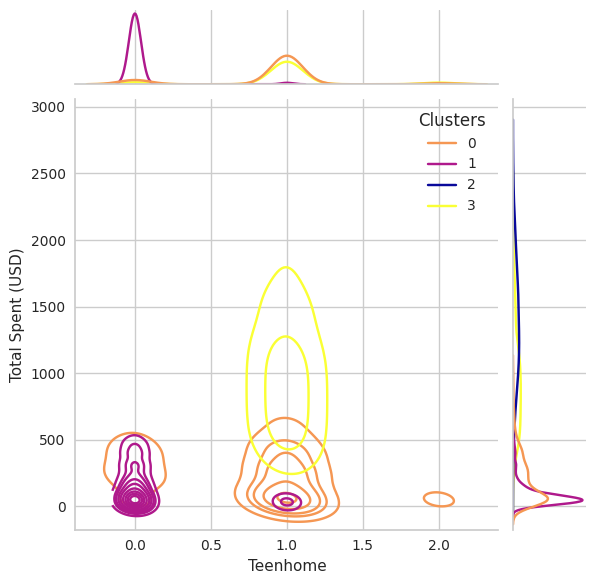

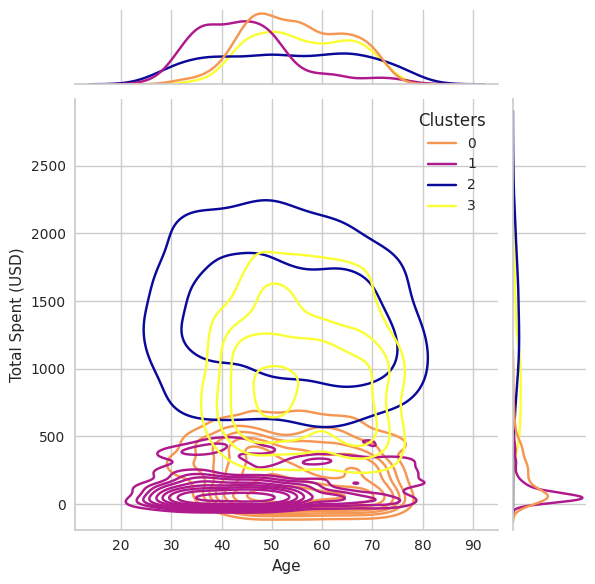

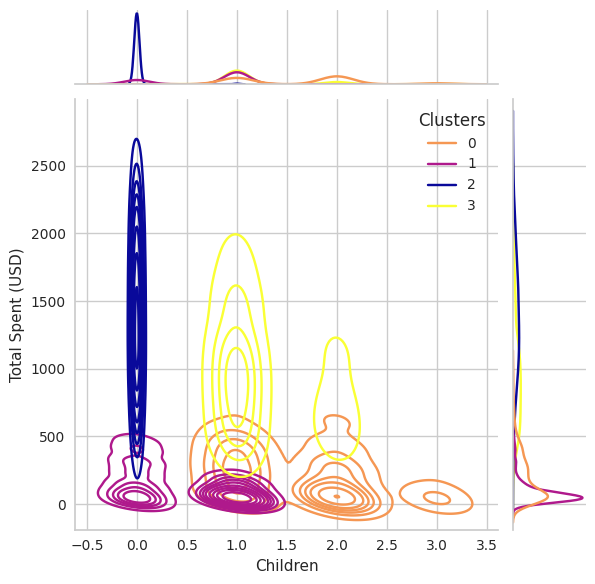

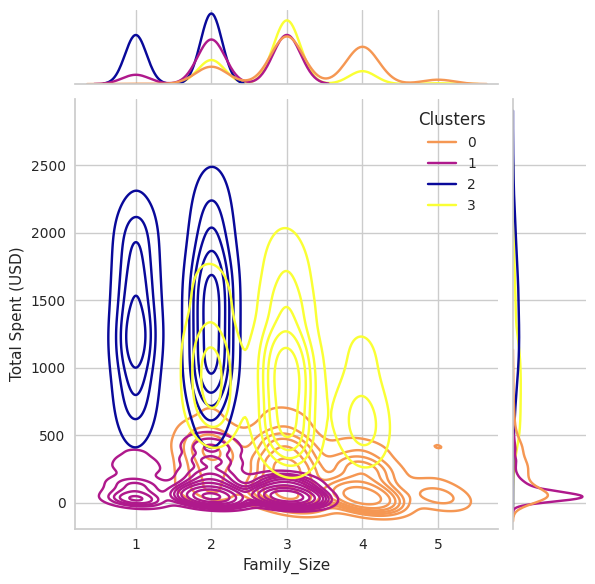

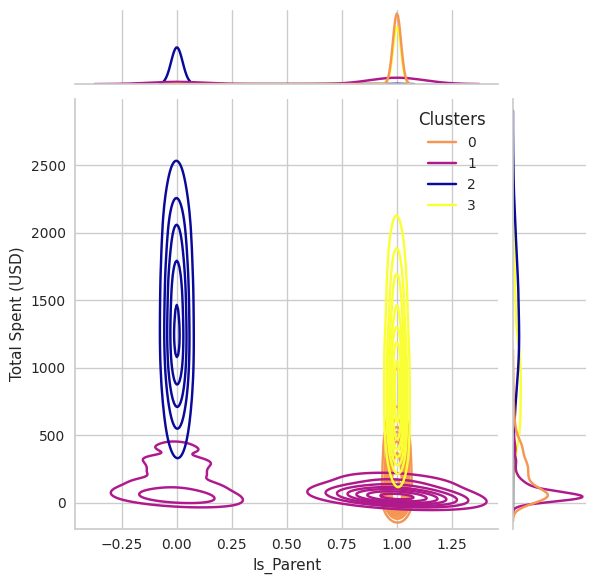

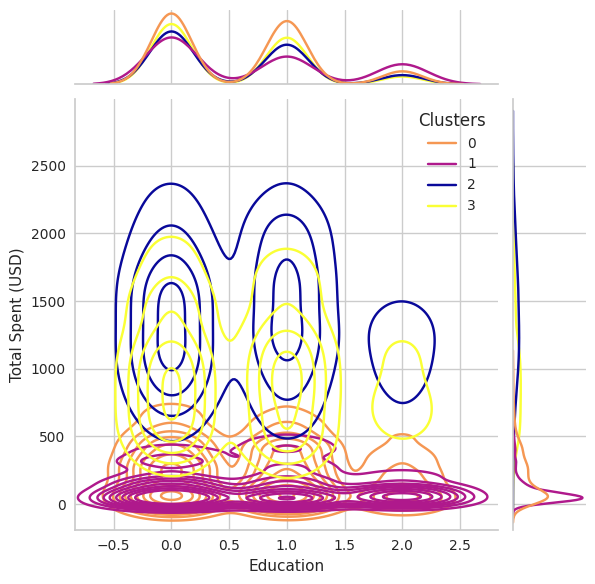

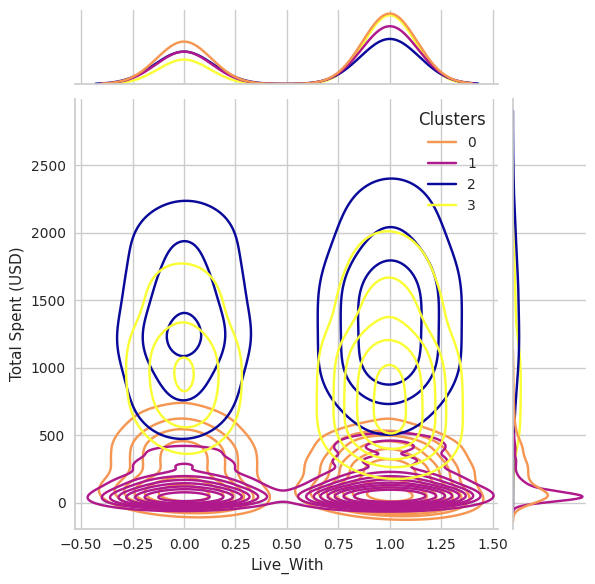

In [19]:
# List of variables with personal information
personal_feats = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Live_With']

# Plot jointplot between Total_Spent and each personal feature
for feat in personal_feats:
    sns.jointplot(data_cleaned, x = feat, y = 'Total_Spent', hue = 'Clusters', kind = 'kde', palette = pal)
    plt.ylabel('Total Spent (USD)')
    plt.show()

From the above plots, we can glean some personal information about each cluster. Below, I list the characteristics of each cluster based on our results:

## Cluster 0

- Definitely a parent, majority have a teenager at home.
- Lower income/spending group
- More older customers than other clusters
- Responds well to deals

## Cluster 1

- Majority are parents, but some don't have kids
- Could represent young parents, most don't have teenagers but have 1-2 kids
- More younger customers than other clusters

## Cluster 2

- Definitely not a parent
- Roughly equal amount of singles and couples, with a slight majority of couples
- High income/spending group
- Widest age range of any cluster

## Cluster 3

- Definitely a parent, most have teenagers at home
- Not as old as cluster 0 on average, but older than clusters 1 and 2
- Includes single parents

# 8) Conclusions

In this notebook, we used an unsupervised clustering algorithm to perform a customer segmentation. The above summary of the demographics of each cluster can be used to help plan better marketing strategies to target the company's top customers. 